In [1]:
import trafpy as tp
import config

Demand config file imported.


## Node Distributions

Normalised matrix:
[[0.   0.05 0.05 0.05 0.05]
 [0.05 0.   0.05 0.05 0.05]
 [0.05 0.05 0.   0.05 0.05]
 [0.05 0.05 0.05 0.   0.05]
 [0.05 0.05 0.05 0.05 0.  ]]
Normalised matrix sum: 1.0


<Figure size 432x288 with 0 Axes>

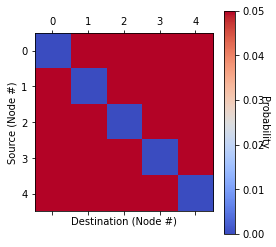

Normalised matrix:
[[0.    0.053 0.04  0.054 0.055]
 [0.053 0.    0.042 0.047 0.051]
 [0.04  0.042 0.    0.05  0.054]
 [0.054 0.047 0.05  0.    0.054]
 [0.055 0.051 0.054 0.054 0.   ]]
Normalised matrix sum: 1.0


<Figure size 432x288 with 0 Axes>

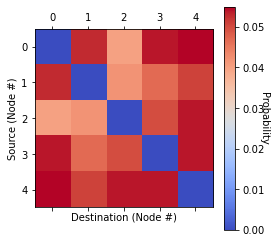

Num skewed nodes: 2
Chosen for skew:
['ep_4', 'ep_4']
Chosen probs:
[0.4, 0.38]
Skewed node pair indices:
[[3. 3.]
 [6. 6.]
 [8. 8.]
 [9. 9.]]
Prob pair chosen: [0.01826 0.02024 0.0209  0.0975  0.01562 0.02068 0.0975  0.0143  0.0975
 0.0975 ]
Normalised matrix:
[[0.      0.01826 0.02024 0.0209  0.0975 ]
 [0.01826 0.      0.01562 0.02068 0.0975 ]
 [0.02024 0.01562 0.      0.0143  0.0975 ]
 [0.0209  0.02068 0.0143  0.      0.0975 ]
 [0.0975  0.0975  0.0975  0.0975  0.     ]]
Normalised matrix sum: 1.0


<Figure size 432x288 with 0 Axes>

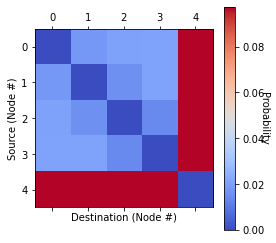

Chosen sources:
['ep_2' 'ep_1' 'ep_0']
Chosen destinations:
['ep_4' 'ep_3' 'ep_2']
Num skewed pairs: 3
Chosen pairs to skew:
[['ep_2', 'ep_4'], ['ep_1', 'ep_3'], ['ep_0', 'ep_2']]
Skew probs:
[0.16, 0.12, 0.13]
Skew indices:
[8. 5. 1.]
Prob pair chosen:
[0.03776 0.065   0.04307 0.04189 0.04779 0.06    0.03776 0.04307 0.08
 0.04366]
Normalised matrix:
[[0.      0.03776 0.065   0.04307 0.04189]
 [0.03776 0.      0.04779 0.06    0.03776]
 [0.065   0.04779 0.      0.04307 0.08   ]
 [0.04307 0.06    0.04307 0.      0.04366]
 [0.04189 0.03776 0.08    0.04366 0.     ]]
Normalised matrix sum: 1.0


<Figure size 432x288 with 0 Axes>

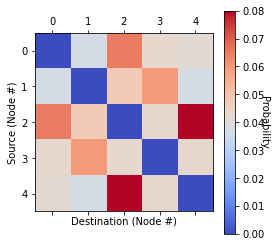

In [2]:
_ = tp.gen_uniform_node_dist(config.ENDPOINT_LABELS, show_fig=True, print_data=True)
_ = tp.gen_uniform_multinomial_exp_node_dist(config.ENDPOINT_LABELS, show_fig=True, print_data=True)
_ = tp.gen_multimodal_node_dist(config.ENDPOINT_LABELS, show_fig=True, print_data=True)
_ = tp.gen_multimodal_node_pair_dist(config.ENDPOINT_LABELS, show_fig=True, print_data=True)

## Value Distributions

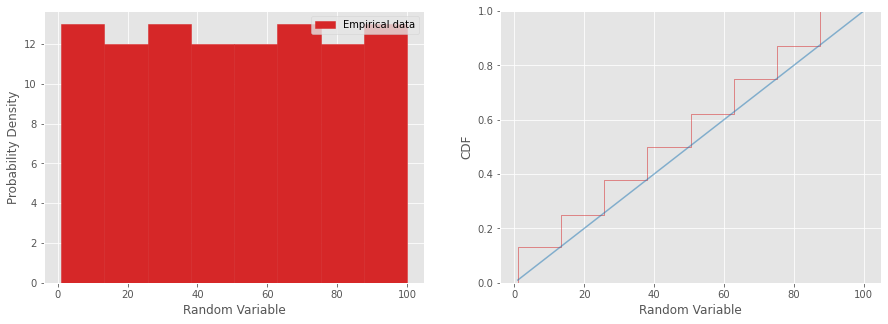

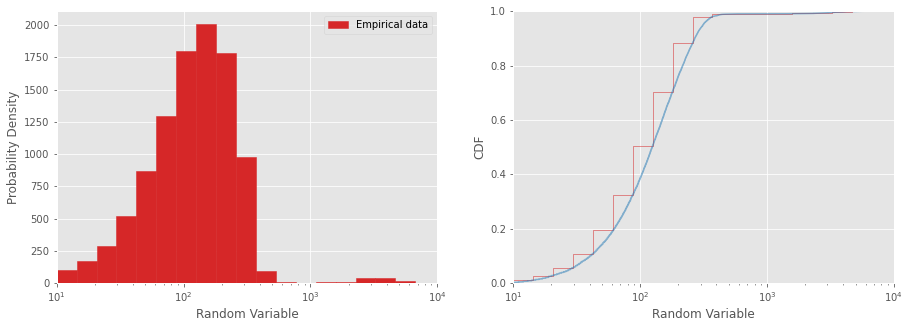

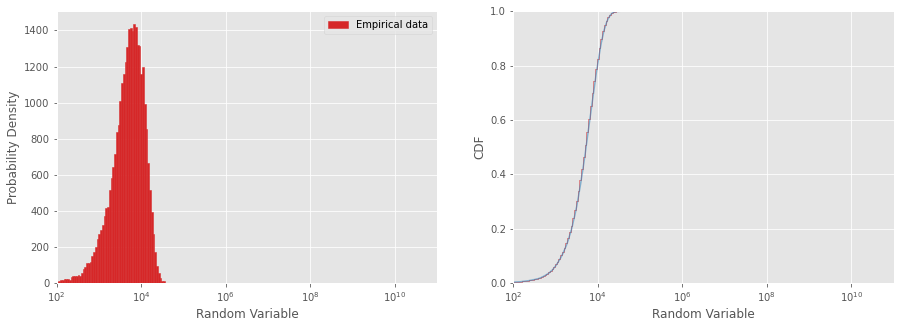

In [3]:
_ = tp.gen_uniform_val_dist(min_val=1,
                            max_val=100,
                            show_fig=True,
                            print_data=False)

_ = tp.gen_multimodal_val_dist(min_val=10,
                               max_val=7000,
                               locations=[20,4000],
                               skews=[6,-1],
                               scales=[150,1500],
                               num_skew_samples=[10000,650],
                               bg_factor=0.05,
                               show_fig=True,
                               print_data=False,
                               logscale=True,
                               xlim=[10,10000],
                               num_bins=18)

_ = tp.gen_named_val_dist(dist='weibull',
                          params={'_alpha': 1.4, '_lambda': 7000},
                          show_fig=True,
                          print_data=False,
                          logscale=True,
                          xlim=[1e2,1e11])

## Generating Job-Centric Demand Data

<Figure size 432x288 with 0 Axes>

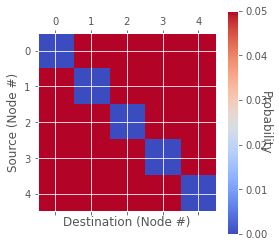

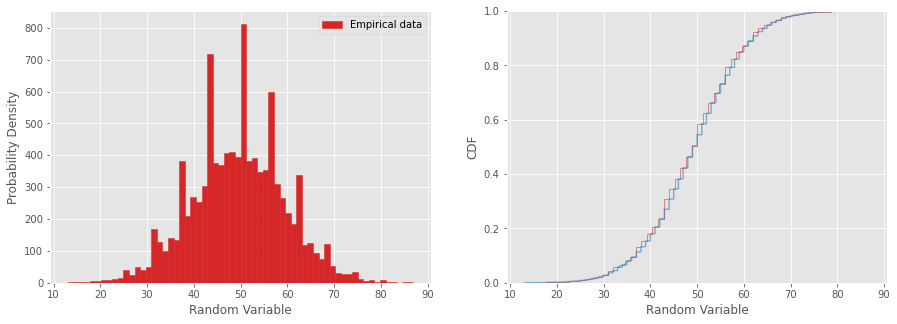

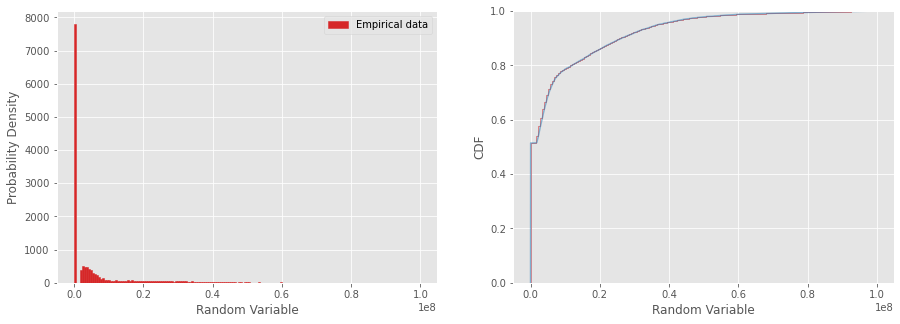

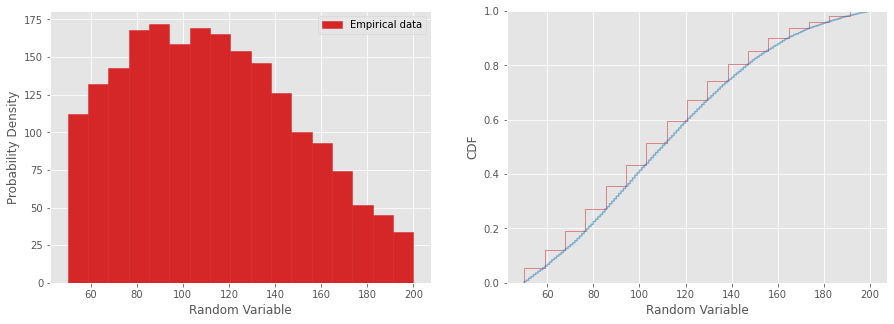

Generating 10 job computation graphs...
Generated 10 job graphs in 0.17252206802368164 seconds
Allocating each op to a machine...
Allocated ops of all jobs to a machine in 0.0786893367767334 seconds
Allocating attrs to each flow in job...
Allocated flow attrs of all jobs in 0.27175474166870117 seconds
Setting op run times...
Set op run times of all jobs in 0.13130784034729004 seconds
Total time to generate & assign attrs of 10 jobs: 0.6549394130706787


In [6]:
node_dist = tp.gen_uniform_node_dist(config.ENDPOINT_LABELS, show_fig=True, print_data=False)
flow_size_dist = tp.gen_multimodal_val_dist(config.MIN_FLOW_SIZE,
                                            config.MAX_FLOW_SIZE,
                                            locations=[50],
                                            skews=[0],
                                            scales=[10],
                                            num_skew_samples=[10000],
                                            bg_factor=0,
                                            round_to_nearest=1,
                                            show_fig=True,
                                            print_data=False)

interarrival_time_dist = tp.gen_multimodal_val_dist(config.MIN_INTERARRIVAL,
                                                    config.MAX_INTERARRIVAL,
                                                    locations=[1, 1, 3000, 1, 1800000, 10000000],
                                                    skews=[0, 100, -10, 10, 50, 6],
                                                    scales=[0.1, 62, 2000, 7500, 3500000, 20000000],
                                                    num_skew_samples=[800, 1000, 2000, 4000, 4000, 3000],
                                                    bg_factor=0.025,
                                                    round_to_nearest=1,
                                                    show_fig=True,
                                                    print_data=False)
num_ops_dist = tp.gen_multimodal_val_dist(config.MIN_NUM_OPS,
                                          config.MAX_NUM_OPS,
                                          locations=[100],
                                          skews=[0.05],
                                          scales=[50],
                                          num_skew_samples=[10000],
                                          bg_factor=0.05,
                                          round_to_nearest=1,
                                          show_fig=True,
                                          print_data=False)

job_centric_demand_data = tp.create_demand_data(num_demands=config.NUM_DEMANDS,
                                                eps=config.ENDPOINT_LABELS,
                                                node_dist=node_dist,
                                                flow_size_dist=flow_size_dist,
                                                interarrival_time_dist=interarrival_time_dist,
                                                num_ops_dist=num_ops_dist,
                                                c=config.C,
                                                use_multiprocessing=False,
                                                print_data=True)

## Generating Flow-Centric Demand Data

## Compiling Data into Dictionary & Demand Data Object

In [7]:
print(job_centric_demand_data)

{'job_id': array(['job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6',
       'job_7', 'job_8', 'job_9'], dtype='<U5'), 'job': array([<networkx.classes.digraph.DiGraph object at 0x7f9ac1a7b910>,
      dtype=object), 'event_time': array([3.32926500e+06, 3.33403300e+06, 3.03619200e+07, 3.03619300e+07,
       3.03751590e+07, 3.03875020e+07, 3.03977640e+07, 5.99657030e+07,
       6.28086590e+07, 1.01379751e+08]), 'establish': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 'index': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])}
